In [9]:
"""Helper functions for manipulating images."""
from PIL import Image
from random import randint
from time import sleep

def divide_image( input_image: Image, rows: int, columns: int) -> list[Image]:
    """Divide `input_image` into `rows` x `columns` pieces and return a list of the pieces."""
    pieces = []  # list of resulting image pieces
    total_width, total_height = input_image.size # input image dimensions
    piece_width = total_width // columns  # width of each piece
    piece_height = total_height // rows  # height of each piece

    # define initial cropping coordinates
    left = 0
    upper = 0
    right = piece_width
    lower = piece_height

    # crop image into pieces
    for row in range(rows):
        for column in range(columns):
            # crop image piece and append to list of pieces
            piece = input_image.crop((left, upper, right, lower))
            pieces.append(piece)

            # update cropping coordinates for next column
            left += piece_width
            right += piece_width

    # update cropping coordinates for next row
    left = 0
    right = 0
    upper += piece_height
    lower += piece_height

    return pieces


def random_list_generator(b: int) -> list[int]:
    """Return a list of `b` random integers within the range of 1 to `b` inclusive.
    The randomness is in the position of each number in the list."""
    numbers = []
    while len(numbers) < b:
        number = randint(1, b)
        if number not in numbers:
            numbers.append(number)

    return numbers

# test each helper function
if __name__ == "__main__":
    print(random_list_generator(10))

"""main.py"""
from PIL import Image
from IPython.display import display
import requests


class Tile:
    tile_id = None
    position = None
    right_position = None
    image = None

    def __init__(self, tile_id: int, position: int, right_position: int, image: Image):
        self.tile_id = tile_id
        self.position = position
        self.right_position = right_position # the correct position of the tile in the puzzle
        self.image = image


    def render(self):
        return self.image

class Puzzle:
    image = None
    tiles  = {}
    empty_position = None
    movable_positions = []

    def __init__(self, puzzle_image_url: str):
        # Read puzzle image
        puzzle_image = requests.get(puzzle_image_url, stream=True).raw
        sleep(10)
        self.image = Image.open(puzzle_image)
        
        # Divide image into list of 9 images
        tile_images = divide_image(self.image, 3,3)

        random_positions = random_list_generator(8)
    # construct 8 tiles from images
        for i in range(len(tile_images) - 1):
            right_position = i + 1
            random_position = random_positions[i]
            tile_id = random_position
            tile_image = tile_images[i]

            tile = Tile(tile_id, random_position, right_position, tile_image)
            self.tiles[tile.tile_id] = tile

        # set initial empty position
        self.empty_position = 9

        # set which tiles are movable based on initial empty position
        self.update_movable_tiles()


    def update_movable_tiles(self):
        """update which tiles are movable and which are not based on the current empty slot."""

        # make all tiles immovable
        self.movable_positions = []

        # update movable tiles based on empty position
        match self.empty_position:
            case 1:
                self.movable_positions.extend([2, 4])
            case 2:
                self.movable_positions.extend([1, 3, 5])
            case 3:
                self.movable_positions.extend([2, 6])
            case 4:
                self.movable_positions.extend([1, 5, 7])
            case 5:
                self.movable_positions.extend([2, 4, 6, 8])
            case 6:
                self.movable_positions.extend([3, 5, 9])
            case 7:
                self.movable_positions.extend([4, 8])
            case 8:
                self.movable_positions.extend([7, 5, 9])
            case 9:
                self.movable_positions.extend([8, 6])

    def move(self, tile_id: int, new_position: int) -> bool:
        """Move specified tile to specified position and update the current empty slot."""
        # check if tile_id and new_position are valid values
        # if ....
        # else: return False

        tile_position = self.tiles[tile_id].position # position of tile to be moved

        # check if new position is empty and tile is movable
        if new_position == self.empty_position and tile_position in self.movable_positions:
            self.tiles[tile_id].position = new_position   # set tile position to new_position
            self.empty_position = tile_position   # set new empty position for the puzzle

        else:
            return False

        # update list of movable tiles
        self.update_movable_tiles()

        return True

    def check_if_player_won(self):
        """Check if player won (i.e. if all tiles are in the right position)"""
        player_won = True
        for tile in self.tiles.values():
            if tile.position != tile.right_position:
                player_won = False
                break
        return player_won


    def render_puzzle(self):
        total_width, total_height = self.image.size
        tile_width = total_width // 3
        tile_height = total_height // 3
        rendered_puzzle = Image.new("RGB", (total_width, total_height), (255, 255, 255))

        for tile in self.tiles.values():
            tile_coordinate_x = tile_width * divmod(tile.position - 1, 3)[1]
            tile_coordinate_y = tile_height * divmod(tile.position - 1, 3)[0]
            rendered_puzzle.paste(tile.render(), (tile_coordinate_x, tile_coordinate_y))

        display(rendered_puzzle)

    def start_win_sequence(self):
        """Write images and text to congratulate the player"""
        win_message = """
 ██████╗ ██████╗ ███╗   ██╗ ██████╗ ██████╗  █████╗ ████████╗██╗   ██╗██╗      █████╗ ████████╗██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██╔═══██╗████╗  ██║██╔════╝ ██╔══██╗██╔══██╗╚══██╔══╝██║   ██║██║     ██╔══██╗╚══██╔══╝██║██╔═══██╗████╗  ██║██╔════╝
██║     ██║   ██║██╔██╗ ██║██║  ███╗██████╔╝███████║   ██║   ██║   ██║██║     ███████║   ██║   ██║██║   ██║██╔██╗ ██║███████╗
██║     ██║   ██║██║╚██╗██║██║   ██║██╔══██╗██╔══██║   ██║   ██║   ██║██║     ██╔══██║   ██║   ██║██║   ██║██║╚██╗██║╚════██║
╚██████╗╚██████╔╝██║ ╚████║╚██████╔╝██║  ██║██║  ██║   ██║   ╚██████╔╝███████╗██║  ██║   ██║   ██║╚██████╔╝██║ ╚████║███████║
 ╚═════╝ ╚═════╝ ╚═╝  ╚═══╝ ╚═════╝ ╚═╝  ╚═╝╚═╝  ╚═╝   ╚═╝    ╚═════╝ ╚══════╝╚═╝  ╚═╝   ╚═╝   ╚═╝ ╚═════╝ ╚═╝  ╚═══╝╚══════╝                                                                                                                             
"""
        print(win_message)
        # render winning image
        # display time taken to solve puzzle in winning image
        

def play():
    """Start the main game sequence"""

    # Welcome the user to the game
    # create animated text effect using time.sleep() define as helper function
    print("Welcome to the puzzle Game!")

    # Instantiate puzzle and display to user
    game = Puzzle("https://seeklogo.com/images/C/colby-college-logo-A33BF0E8D6-seeklogo.com.png")
    game.render_puzzle()
    player_won = False

    while not player_won:
        # Ask user which tile they would like to move and to what destination
        user_tile = input("What tile would you like to move?\n")
        user_destination = input("Where would you like to move it to\n")

        # move tile and update empty slot and movable tiles
        moved = game.move(int(user_tile), int(user_destination))
        if not moved:
            print("Choose a valid tile!\n")
        else:
            game.render_puzzle()

        # check if player won
        player_won = game.check_if_player_won()

    game.start_win_sequence()



[6, 7, 9, 2, 8, 1, 4, 3, 5, 10]


Welcome to the puzzle Game!


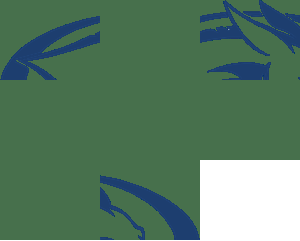

Choose a valid tile!


ValueError: invalid literal for int() with base 10: ''

In [10]:
#!pip install pillow-puzzle-game
"""
██████╗ ██╗      █████╗ ██╗   ██╗
██╔══██╗██║     ██╔══██╗╚██╗ ██╔╝
██████╔╝██║     ███████║ ╚████╔╝ 
██╔═══╝ ██║     ██╔══██║  ╚██╔╝  
██║     ███████╗██║  ██║   ██║   
╚═╝     ╚══════╝╚═╝  ╚═╝   ╚═╝                                    
"""
play()
